
# Project - ENSEMBLE TECHNIQUES


### Importing Required Python Modules and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from sklearn.ensemble import ExtraTreesClassifier, VotingClassifier
from imblearn.over_sampling import SMOTE
import pickle
from warnings import filterwarnings
filterwarnings('ignore') 

### * Import all the given Datasets and Explore Shape and Size.
  

In [2]:
teledata = pd.read_csv('TelcomCustomer-Churn.csv')
T = teledata.shape
print('Number of Rows    =',T[0],'\nNumber of Columns =',T[1])

Number of Rows    = 7043 
Number of Columns = 21


# Data Cleansing:

In [3]:
copy_teledata = teledata.copy()   
copy_teledata2 = teledata.copy()   

###  * Missing Value Treatment:

### Checking for Null Values in the Attributes

In [4]:
teledata.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Checking Data Type of Quantitative Attributes

In [5]:
qt_data = teledata[['tenure','MonthlyCharges','TotalCharges']]
QT = qt_data.dtypes
QT

tenure              int64
MonthlyCharges    float64
TotalCharges       object
dtype: object

### Converting Datatype of TotalCharges to Numerical Float datatype

In [6]:
teledata['TotalCharges'] = pd.to_numeric(teledata['TotalCharges'],errors='coerce')
qt_data = teledata[['tenure','MonthlyCharges','TotalCharges']]
QT = qt_data.dtypes
QT

tenure              int64
MonthlyCharges    float64
TotalCharges      float64
dtype: object

### Checking for Null Values in TotalCharges Attributes after Datatype Conversion

In [7]:
teledata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Removing Null Values in TotalCharges Attributes after Datatype Conversion

In [8]:
teledata.dropna(inplace=True)
teledata.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

###  * Convert Categorical Attributes to Continuous using relevant Functional Knowledge

### Checking Data Types and Unique Values in every Categorical Attribute

In [9]:
cat_data = teledata.drop(columns=['customerID','tenure','MonthlyCharges','TotalCharges'])
CD = cat_data.apply(lambda col: col.unique()).to_frame('Unique Values')
CD['Total Unique Values'] = cat_data.apply(lambda col: col.nunique())
CD['Data Type'] = cat_data.dtypes
CD

,Unique Values,Total Unique Values,Data Type
gender,"[Female, Male]",2,object
SeniorCitizen,"[0, 1]",2,int64
Partner,"[Yes, No]",2,object
Dependents,"[No, Yes]",2,object
PhoneService,"[No, Yes]",2,object
MultipleLines,"[No phone service, No, Yes]",3,object
InternetService,"[DSL, Fiber optic, No]",3,object
OnlineSecurity,"[No, Yes, No internet service]",3,object
OnlineBackup,"[Yes, No, No internet service]",3,object
DeviceProtection,"[No, Yes, No internet service]",3,object


### Converting Categorical Attribute to Continuous form

In [10]:
Replace = {'gender':{'Female':0,'Male':1},
           'InternetService':{'No':0,'DSL':1,'Fiber optic':2},
           'Contract':{'Month-to-month':0,'One year':1,'Two year':2},
           'PaymentMethod':{'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3},
           'Partner':{'No':0,'Yes':1},
           'Dependents':{'No':0,'Yes':1},
           'PhoneService':{'No':0,'Yes':1},
           'PaperlessBilling':{'No':0,'Yes':1},
           'Churn':{'No':0,'Yes':1},
           'MultipleLines':{'No':0,'Yes':1,'No phone service':0},
           'OnlineSecurity':{'No':0,'Yes':1,'No internet service':0},
           'OnlineBackup':{'No':0,'Yes':1,'No internet service':0},
           'DeviceProtection':{'No':0,'Yes':1,'No internet service':0},
           'TechSupport':{'No':0,'Yes':1,'No internet service':0},
           'StreamingTV':{'No':0,'Yes':1,'No internet service':0},
           'StreamingMovies':{'No':0,'Yes':1,'No internet service':0},
          }

teledata = teledata.replace(Replace)
cat_data = teledata.drop(columns=['customerID','tenure','MonthlyCharges','TotalCharges'])
CD = cat_data.apply(lambda col: col.unique()).to_frame('Unique Values')
CD['Total Unique Values'] = cat_data.apply(lambda col: col.nunique())
CD['Data Type'] = cat_data.dtypes
CD.index.name = 'Categorical Attributes'
CD

,Unique Values,Total Unique Values,Data Type
Categorical Attributes,,,
gender,"[0, 1]",2,int64
SeniorCitizen,"[0, 1]",2,int64
Partner,"[1, 0]",2,int64
Dependents,"[0, 1]",2,int64
PhoneService,"[0, 1]",2,int64
MultipleLines,"[0, 1]",2,int64
InternetService,"[1, 2, 0]",3,int64
OnlineSecurity,"[0, 1]",2,int64
OnlineBackup,"[1, 0]",2,int64


### * Drop Attribute/s If Required using relevant Functional Knowledge

### Dropping customerID Attribute

In [11]:
teledata.drop(['customerID'],axis=1,inplace=True)

### * Automate All the Above Steps

In [12]:
for i in copy_teledata.columns:
    if (copy_teledata[i].dtype=='O'):
        if i == 'TotalCharges':
            copy_teledata[i] = pd.to_numeric(copy_teledata[i],errors='coerce')
            copy_teledata.dropna(inplace=True)
        elif i == 'customerID':
            copy_teledata.drop([i],axis=1,inplace=True)
        elif (i=='gender')|(i=='InternetService' )|(i=='Contract')|(i=='PaymentMethod'):
            copy_teledata[i] = copy_teledata[i].astype('category')
            copy_teledata[i] = np.int64(copy_teledata[i].cat.codes)
        else:
            copy_teledata[i] = np.int64(np.where(copy_teledata[i].str.contains("No"),0,1))     

***
**Key Observations:-**
* We have successfully automated the steps.
* Categorical attributes and converted to continuous form by Manual and Automated Procedures.
* After dropping the values we got 7032 rows for both Manual and Automated Procedures.
* There is a differece in Manual and Automated Encoded values.(eg:- In Attribute "PaymentMethod", Manual=[0, 1, 2, 3] & Automate=[2, 3, 0, 1]).
* This is due to usage of cat.codes which encodes the value automatically.
***

## Data Analysis & Visualisation:

###  * Perform Detailed Statistical Analysis on the Data.

### Brief Summary of Data

In [13]:
teledata.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,1.224118,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.688567,0.592719,1.315557,64.798208,2283.300441,0.265785
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.778643,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.832934,0.491363,1.149523,30.085974,2266.771362,0.441782
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.587500,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.862500,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


### **Checking Covariance related with attributes**

In [14]:
teledata.cov()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,0.250014,-0.000336,-0.000345,0.002368,0.064867,-0.001111,-0.002194,-0.003754,-0.003692,-0.003112,-0.000192,-0.001931,-0.001733,-0.002463,0.000039,-0.002924,-0.002832,-0.207288,5.422208e-02,-0.001887
SeniorCitizen,-0.000336,0.136046,0.003125,-0.035540,0.141988,0.000915,0.026050,0.074393,-0.006434,0.011688,0.010427,-0.010140,0.018921,0.021545,-0.043570,0.028320,-0.039734,2.439951,8.562397e+01,0.024530
Partner,-0.000345,0.003125,0.249730,0.103430,4.684523,0.002717,0.035187,0.000365,0.032392,0.033696,0.036452,0.027262,0.030263,0.028768,0.122414,-0.003427,0.076563,1.470784,3.614364e+02,-0.033112
Dependents,0.002368,-0.035540,0.103430,0.209425,1.835254,-0.000146,-0.005494,-0.063351,0.016717,0.005142,0.003022,0.013096,-0.003673,-0.008560,0.091694,-0.024764,0.065232,-1.546763,6.706746e+01,-0.032980
tenure,0.064867,0.141988,4.684523,1.835254,602.469774,0.057149,4.029663,0.597677,3.643735,4.213649,4.215207,3.623604,3.346595,3.414465,13.835544,0.058170,9.619692,182.299526,4.595074e+04,-3.839186
PhoneService,-0.001111,0.000915,0.002717,-0.000146,0.057149,0.087362,0.040807,0.021676,-0.012253,-0.007325,-0.009839,-0.012762,-0.003075,-0.004823,0.000743,0.002425,-0.001055,2.205644,7.571460e+01,0.001527
MultipleLines,-0.002194,0.026050,0.035187,-0.005494,4.029663,0.040807,0.243940,0.132704,0.022019,0.047479,0.047330,0.022510,0.061944,0.062397,0.044236,0.039739,0.020444,7.294726,5.251225e+02,0.008735
InternetService,-0.003754,0.074393,0.000365,-0.063351,0.597677,0.021676,0.132704,0.606285,0.055099,0.113713,0.115927,0.058142,0.162738,0.161987,-0.187339,0.144485,-0.159909,21.209853,7.557967e+02,0.108821
OnlineSecurity,-0.003692,-0.006434,0.032392,0.016717,3.643735,-0.012253,0.022019,0.055099,0.204467,0.060891,0.059043,0.072741,0.038609,0.041308,0.092524,-0.000900,0.084647,4.032948,4.229298e+02,-0.034214
OnlineBackup,-0.003112,0.011688,0.033696,0.005142,4.213649,-0.007325,0.047479,0.113713,0.060891,0.225961,0.068432,0.063362,0.065121,0.063605,0.061474,0.029677,0.052592,6.314521,5.496425e+02,-0.017285


### **Checking Correlation by plotting Heatmap for attributes**

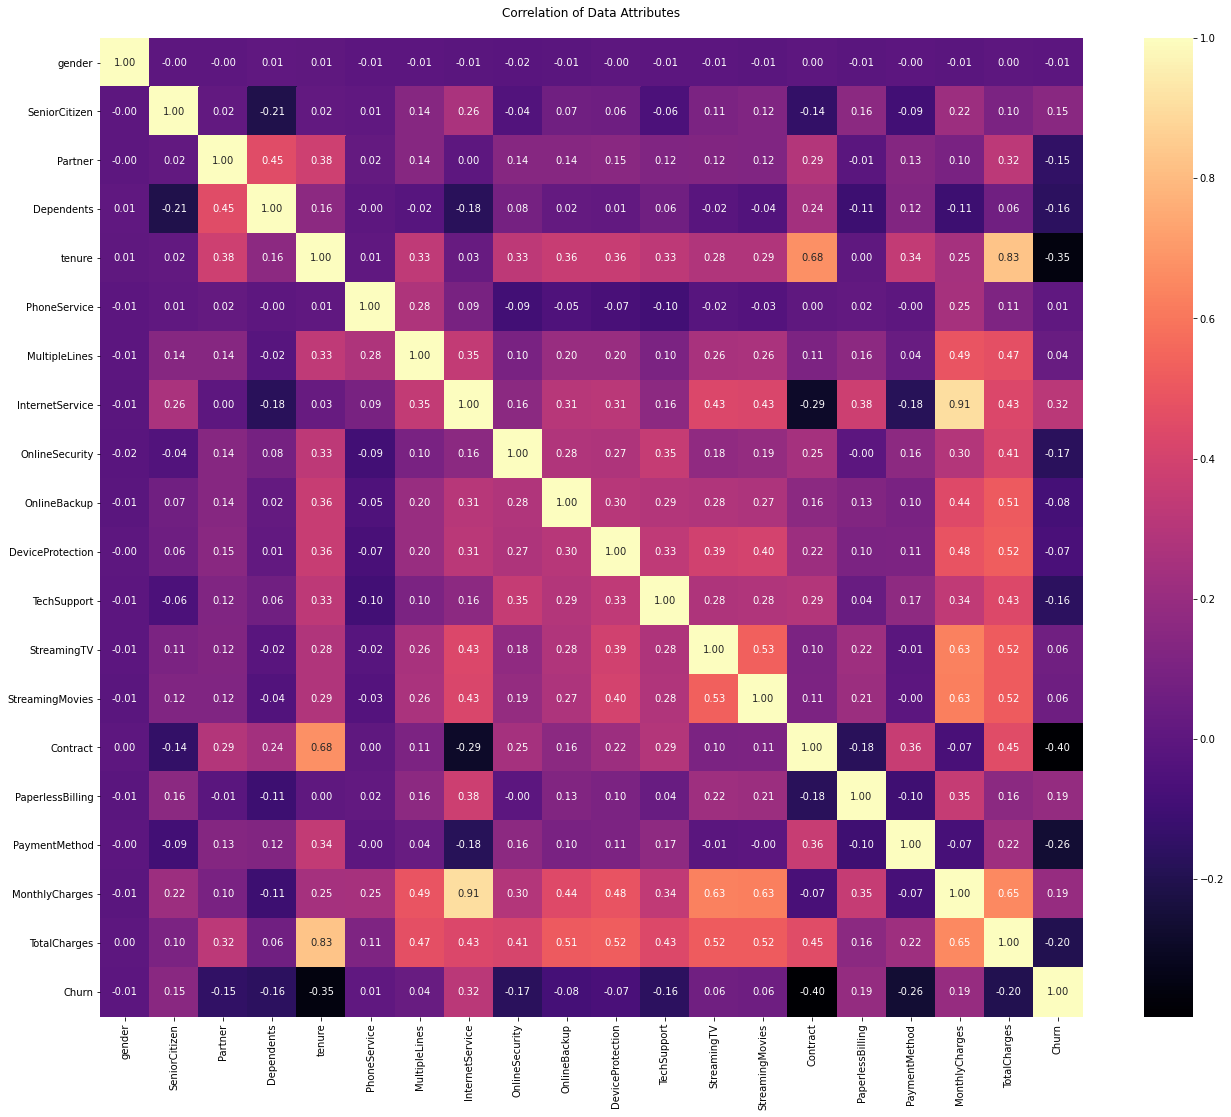

In [15]:
plt.figure(figsize=(22,18))
plt.title('Correlation of Data Attributes\n')
sns.heatmap(teledata.corr(),annot=True,fmt= '.2f',cmap='magma');
plt.show()

###  * Perform a Detailed Univariate, Bivariate and Multivariate Analysis with Appropriate detailed comments after Each Analysis.

In [16]:
# Creating Plot function for Quantitative Attributes

def qt_data(x):   
    print(f'\033[1mPlot Showing Distribution of Feature "{x}":-')
    plt.figure(figsize=(12,6))
    plt.title(f'Distribution of "{x}"\n')
    sns.distplot(teledata[x],color='#9400D3');
    plt.show()
    print(f'\033[1mPlot Showing 5 point summary with outliers of Attribute "{x}":-\n')
    plt.figure(figsize=(12,6))
    plt.title(f'Box Plot for "{x}"\n')
    sns.boxplot(teledata[x],color="#9400D3");
    plt.show()

# Creating Plot function for Categorical Attributes

def cat_data(x):
    colors = ['gold','tomato','yellowgreen','#ADD8E6']
    print(f'\033[1mPlot Showing Frequency Distribution of Attribute "{x}":-')
    plt.figure(figsize=(10,8))
    plt.title(f'Frequencies of "{x}" Attribute\n')
    sns.countplot(teledata[x],palette='bright');
    plt.show()
    print(f'\033[1m\nPie Chart Showing Contribution of Each Category of "{x}" feature:-\n')
    plt.title(f'Contribution of Each Category of "{x}" Attribute\n\n\n\n\n\n')
    teledata[x].value_counts().plot.pie(radius=2.5,shadow=True,autopct='%1.1f%%',colors=colors);
    plt.legend(loc='right',prop={'size': 12}, bbox_to_anchor=(2, 1))
    plt.show()

* Plot Function is Created, Now we will do Univariate Analysis

#### Attribute 1: "gender"

Plot Showing Frequency Distribution of Attribute "gender":-


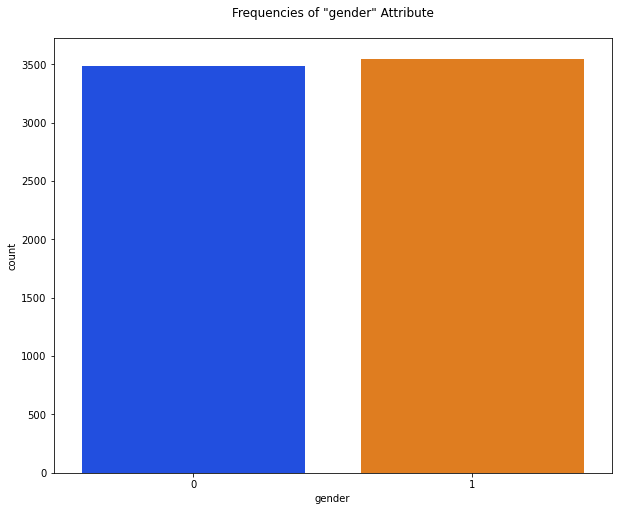


Pie Chart Showing Contribution of Each Category of "gender" feature:-



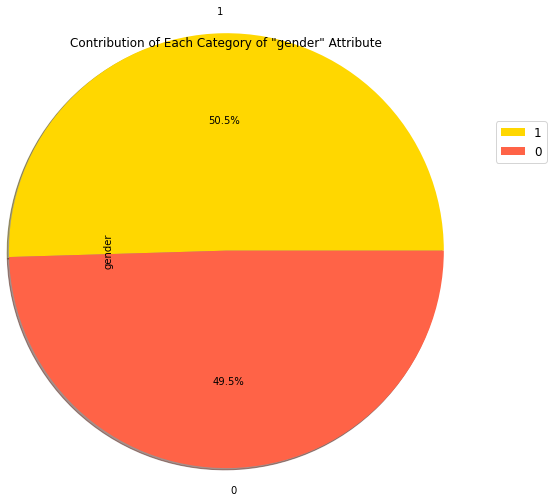

In [17]:
cat_data('gender')

#### Attribute 2: "SeniorCitizen"

Plot Showing Frequency Distribution of Attribute "SeniorCitizen":-


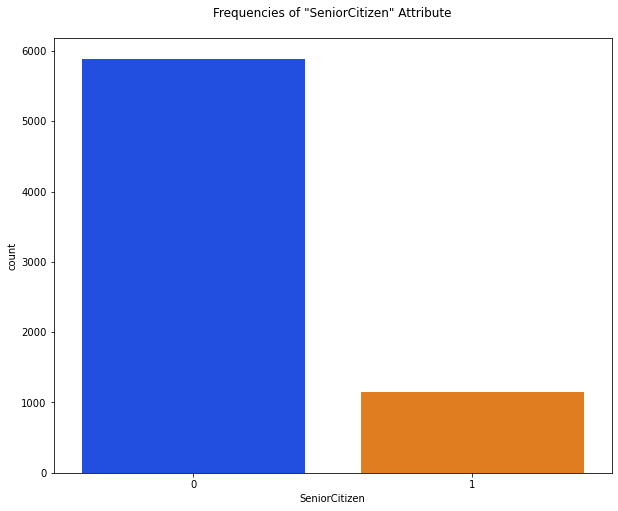


Pie Chart Showing Contribution of Each Category of "SeniorCitizen" feature:-



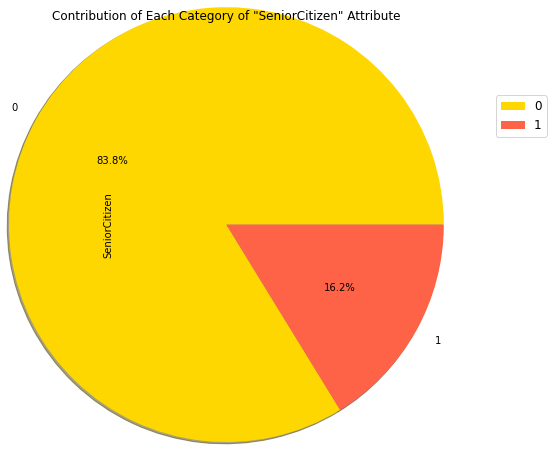

In [18]:
cat_data('SeniorCitizen')

#### Attribute 3: "Partner"

Plot Showing Frequency Distribution of Attribute "Partner":-


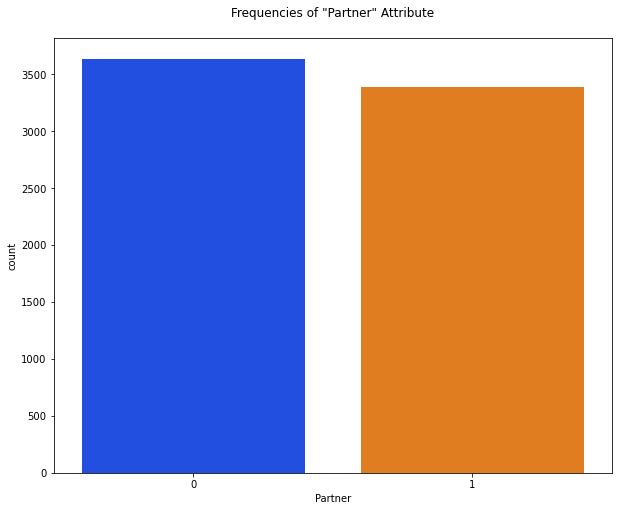


Pie Chart Showing Contribution of Each Category of "Partner" feature:-



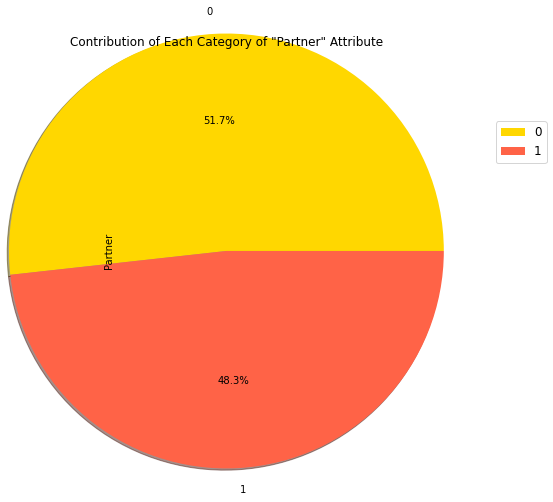

In [19]:
cat_data('Partner')

#### Attribute 4: "Dependents"

Plot Showing Frequency Distribution of Attribute "Dependents":-


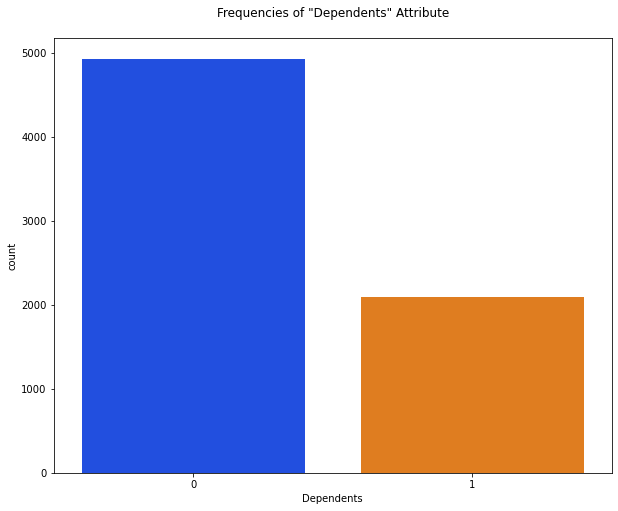


Pie Chart Showing Contribution of Each Category of "Dependents" feature:-



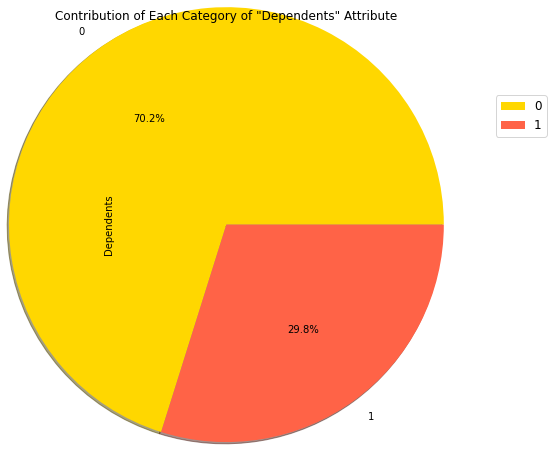

In [20]:
cat_data('Dependents')

#### Attribute 5: "tenure"

Plot Showing Distribution of Feature "tenure":-


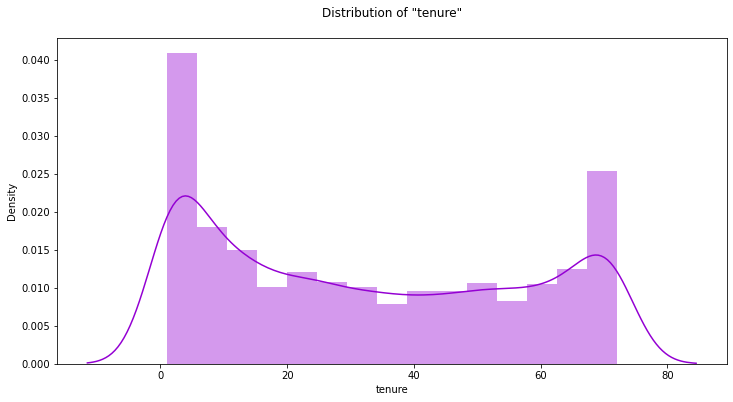

Plot Showing 5 point summary with outliers of Attribute "tenure":-



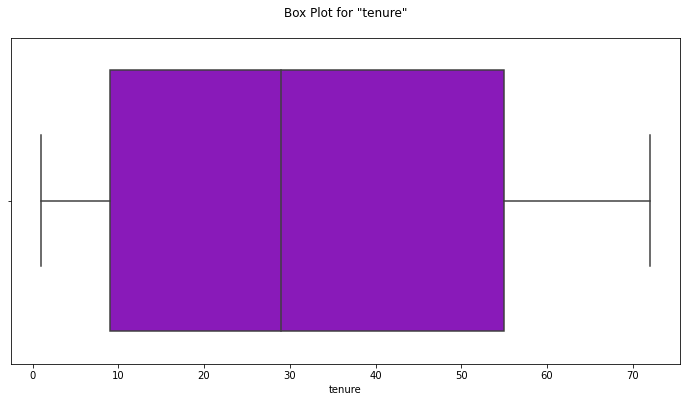

In [21]:
qt_data('tenure')

#### Attribute 6: "PhoneService"

Plot Showing Frequency Distribution of Attribute "PhoneService":-


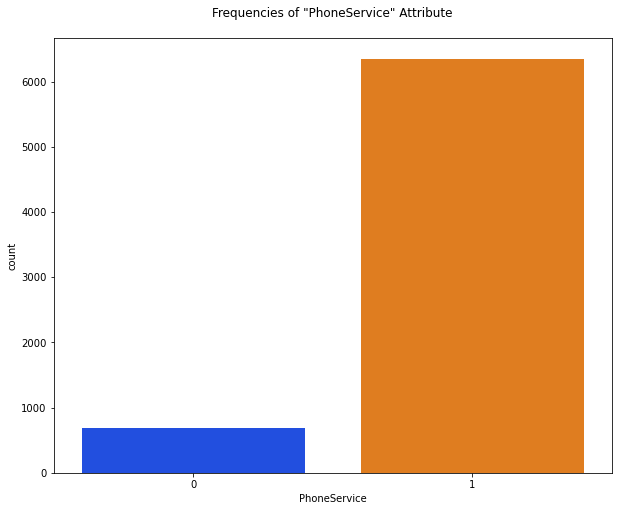


Pie Chart Showing Contribution of Each Category of "PhoneService" feature:-



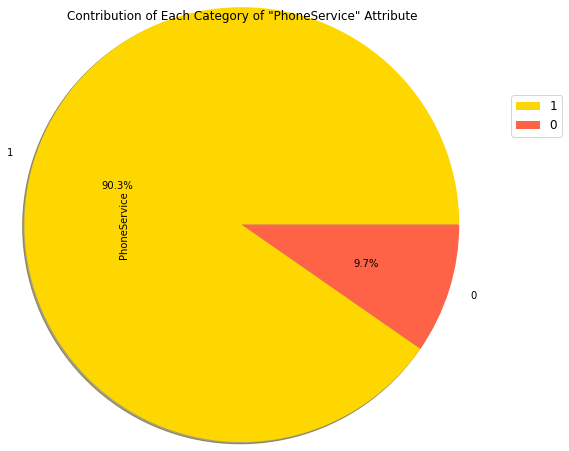

In [22]:
cat_data('PhoneService')

#### Attribute 7: "MultipleLines"

Plot Showing Frequency Distribution of Attribute "MultipleLines":-


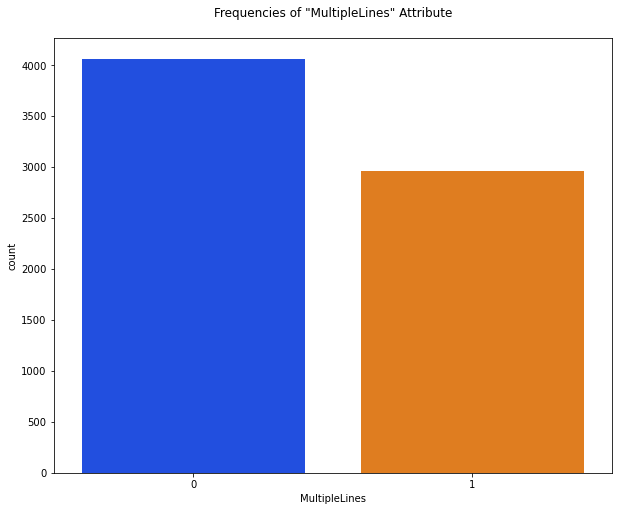


Pie Chart Showing Contribution of Each Category of "MultipleLines" feature:-



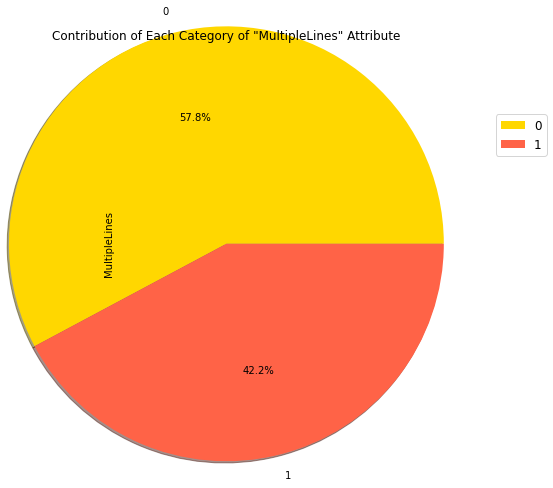

In [23]:
cat_data('MultipleLines')

#### Attribute 8: "InternetService"

Plot Showing Frequency Distribution of Attribute "InternetService":-


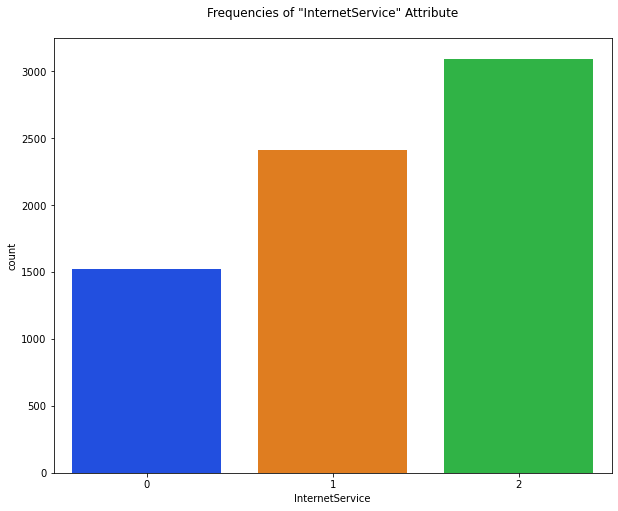


Pie Chart Showing Contribution of Each Category of "InternetService" feature:-



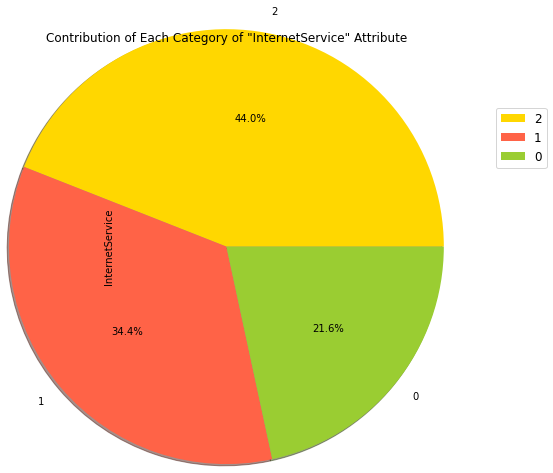

In [24]:
cat_data('InternetService')

#### Attribute 9: "OnlineSecurity"

Plot Showing Frequency Distribution of Attribute "OnlineSecurity":-


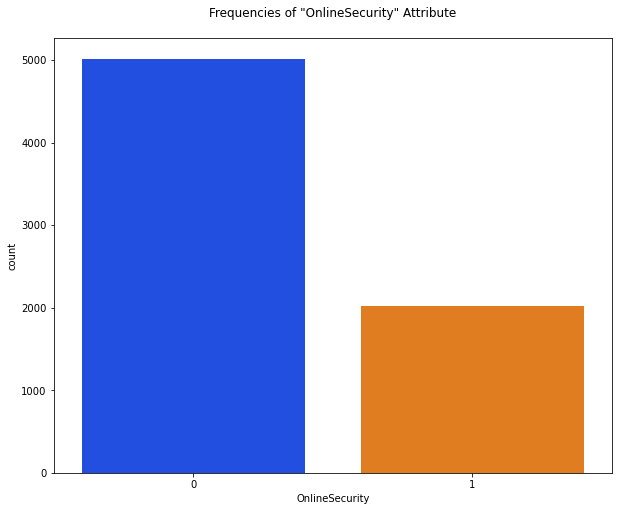


Pie Chart Showing Contribution of Each Category of "OnlineSecurity" feature:-



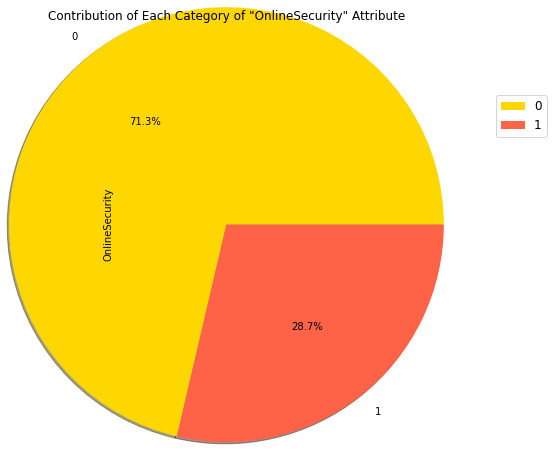

In [25]:
cat_data('OnlineSecurity')

#### Attribute 10: "OnlineBackup"

Plot Showing Frequency Distribution of Attribute "OnlineBackup":-


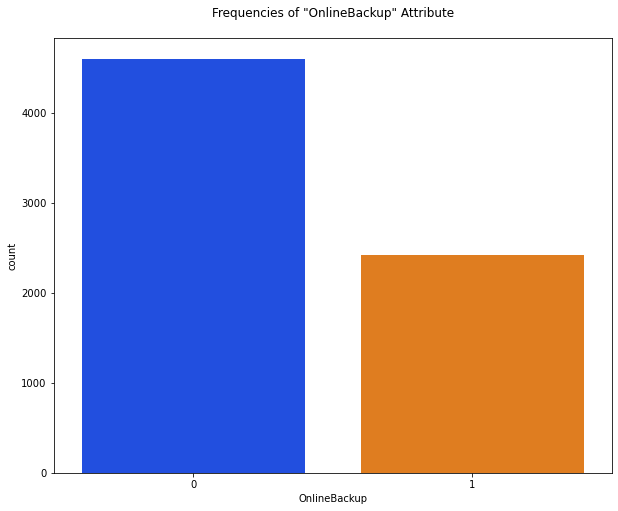


Pie Chart Showing Contribution of Each Category of "OnlineBackup" feature:-



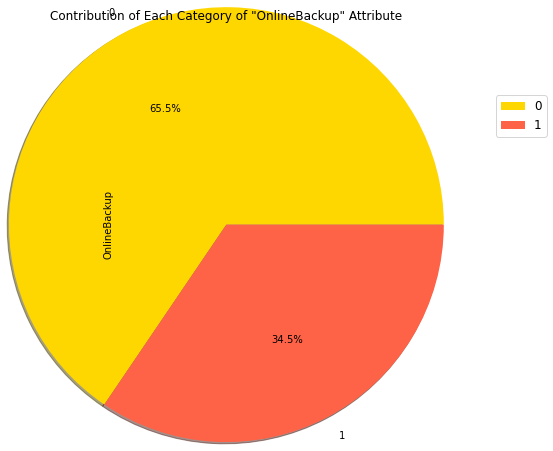

In [26]:
cat_data('OnlineBackup')

#### Attribute 11: "DeviceProtection"

Plot Showing Frequency Distribution of Attribute "DeviceProtection":-


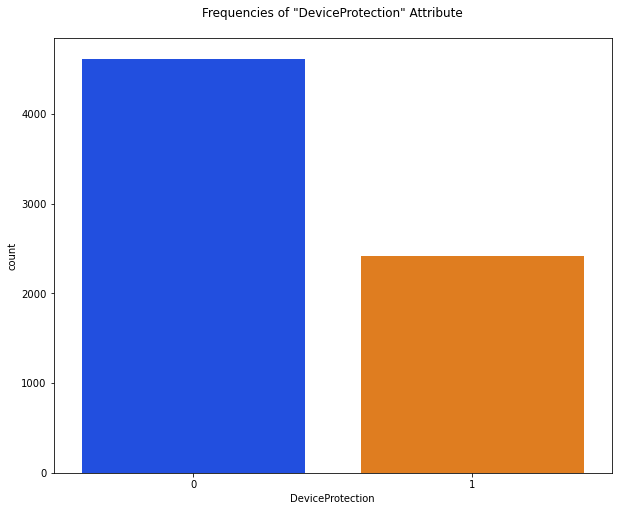


Pie Chart Showing Contribution of Each Category of "DeviceProtection" feature:-



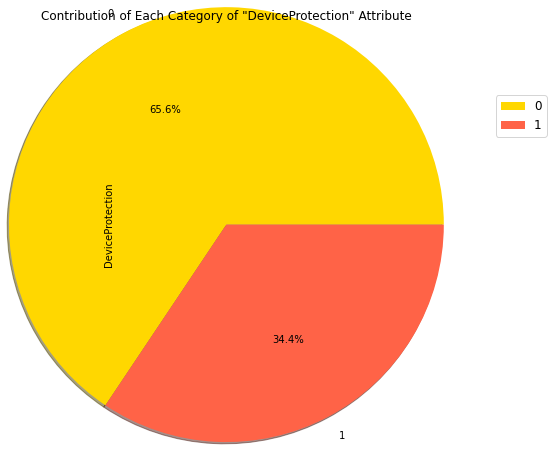

In [27]:
cat_data('DeviceProtection')

#### Attribute 12: "TechSupport"

Plot Showing Frequency Distribution of Attribute "TechSupport":-


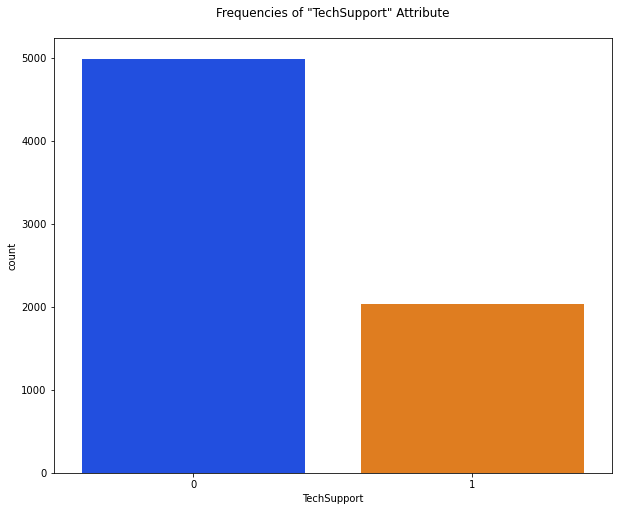


Pie Chart Showing Contribution of Each Category of "TechSupport" feature:-



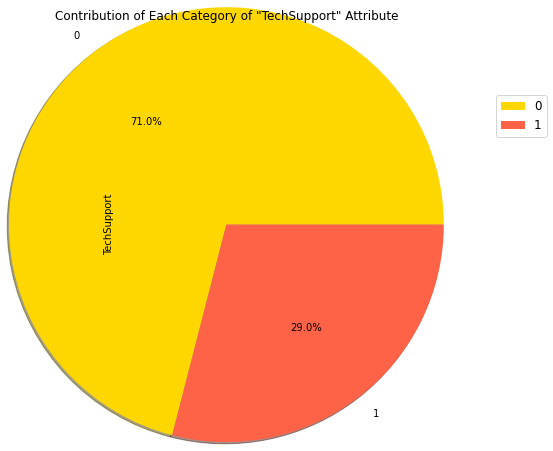

In [28]:
cat_data('TechSupport')

#### Attribute 13: "StreamingTV"

Plot Showing Frequency Distribution of Attribute "StreamingTV":-


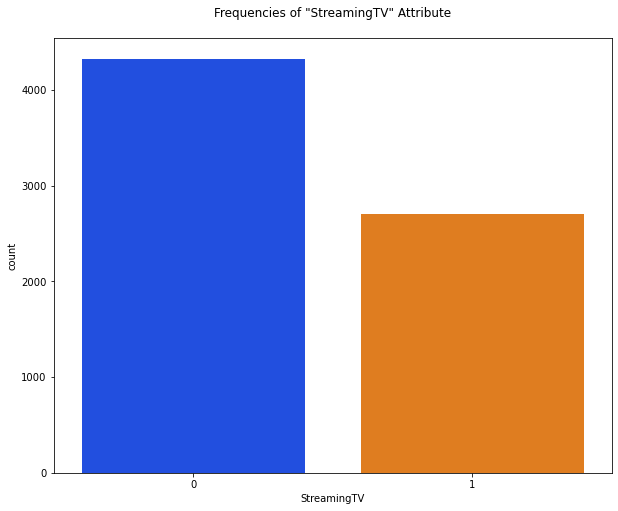


Pie Chart Showing Contribution of Each Category of "StreamingTV" feature:-



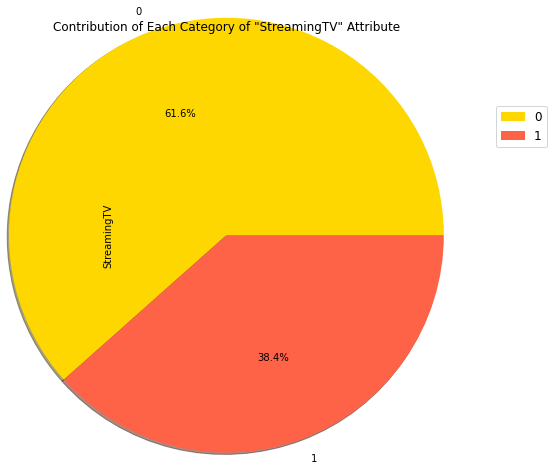

In [29]:
cat_data('StreamingTV')

#### Attribute 14: "StreamingMovies"

Plot Showing Frequency Distribution of Attribute "StreamingMovies":-


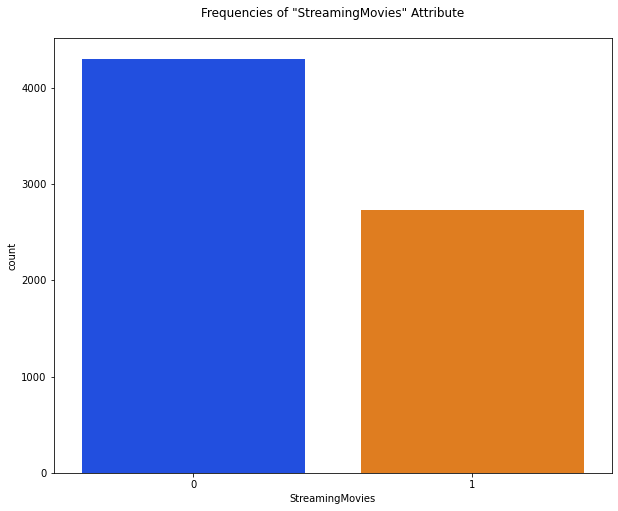


Pie Chart Showing Contribution of Each Category of "StreamingMovies" feature:-



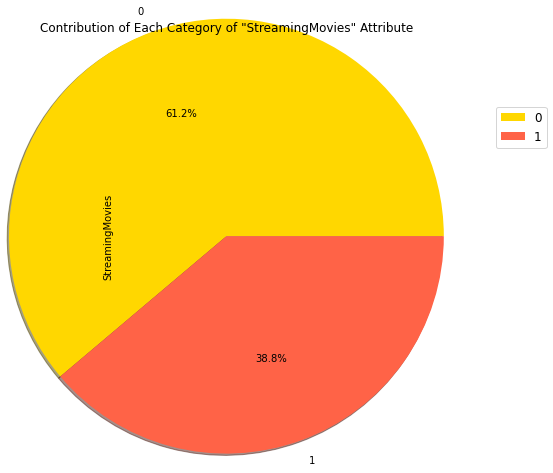

In [30]:
cat_data('StreamingMovies')

#### Attribute 15: "Contract"

Plot Showing Frequency Distribution of Attribute "Contract":-


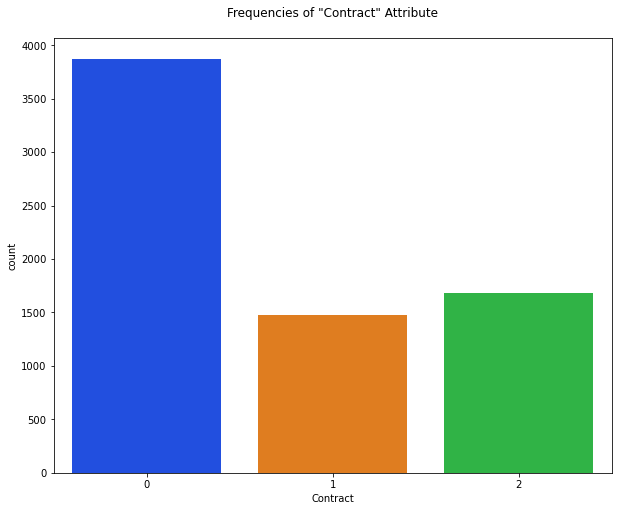


Pie Chart Showing Contribution of Each Category of "Contract" feature:-



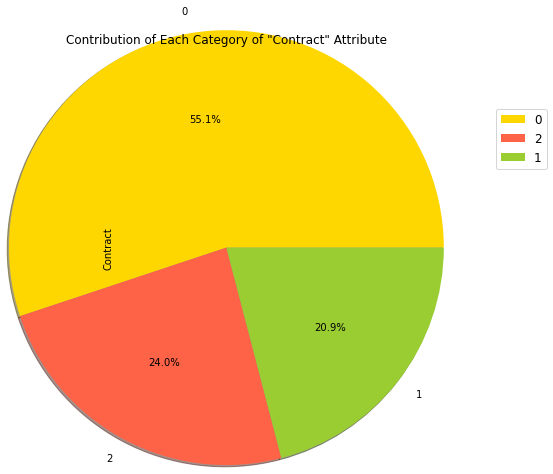

In [31]:
cat_data('Contract')

#### Attribute 16: "PaperlessBilling"

Plot Showing Frequency Distribution of Attribute "PaperlessBilling":-


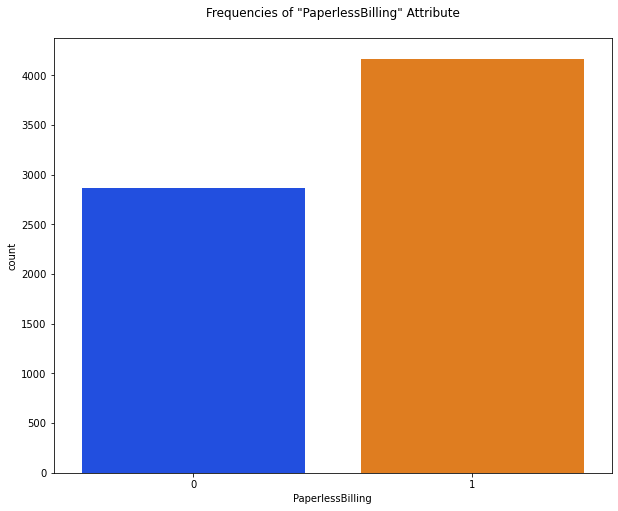


Pie Chart Showing Contribution of Each Category of "PaperlessBilling" feature:-



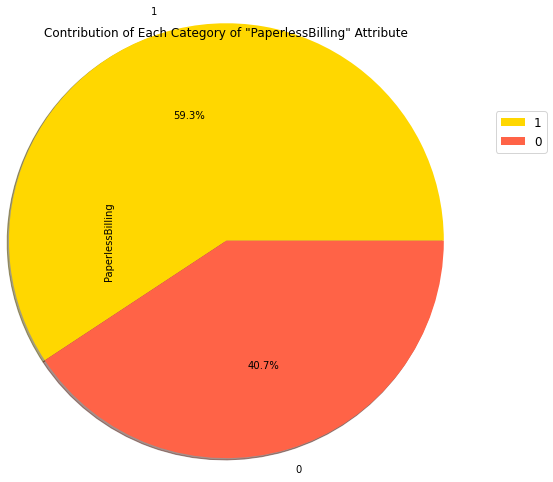

In [32]:
cat_data('PaperlessBilling')

#### Attribute 17: "PaymentMethod"

Plot Showing Frequency Distribution of Attribute "PaymentMethod":-


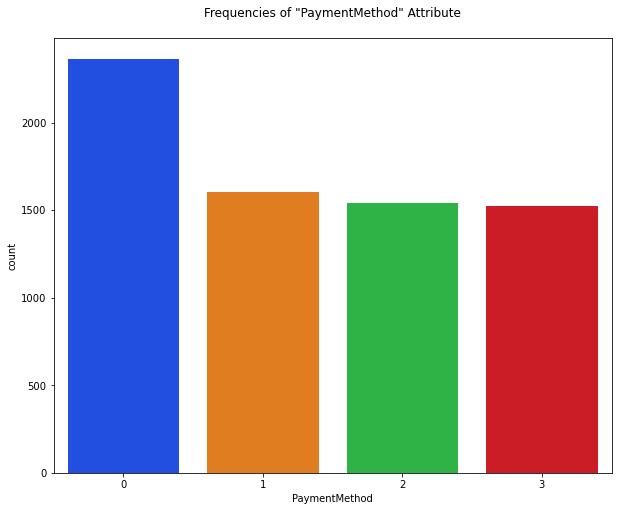


Pie Chart Showing Contribution of Each Category of "PaymentMethod" feature:-



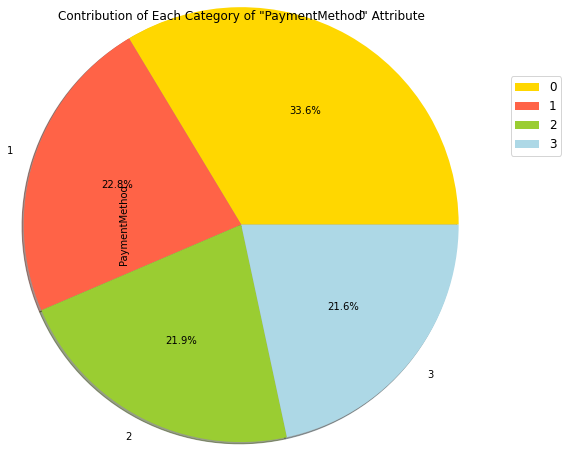

In [33]:
cat_data('PaymentMethod')

#### Attribute 18: "MonthlyCharges"

Plot Showing Distribution of Feature "MonthlyCharges":-


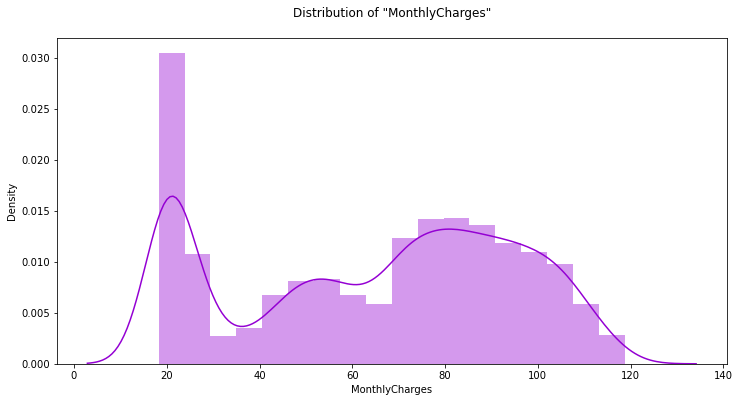

Plot Showing 5 point summary with outliers of Attribute "MonthlyCharges":-



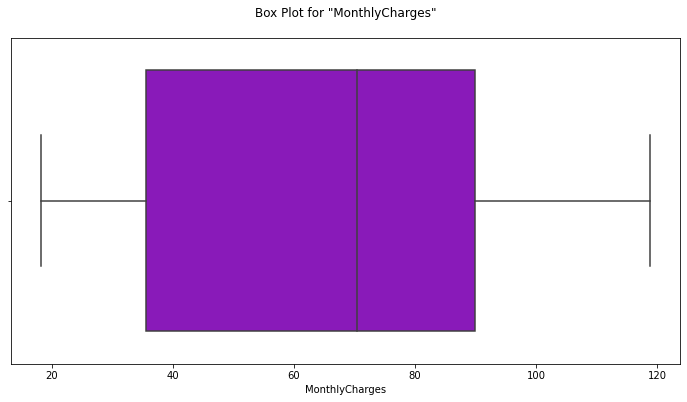

In [34]:
qt_data('MonthlyCharges')

#### Attribute 19: "TotalCharges"

Plot Showing Distribution of Feature "TotalCharges":-


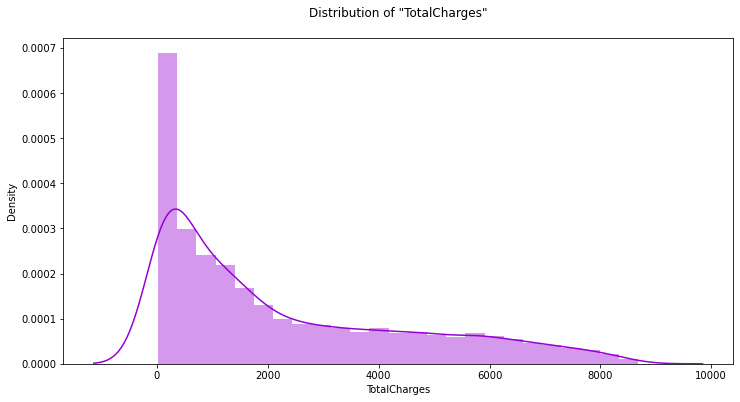

Plot Showing 5 point summary with outliers of Attribute "TotalCharges":-



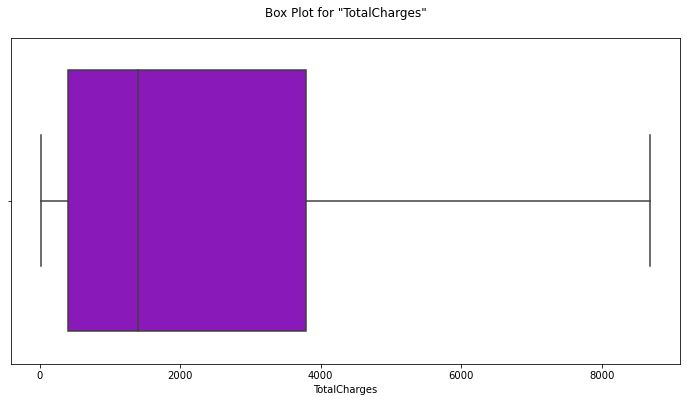

In [35]:
qt_data('TotalCharges')

#### Attribute 20: "Churn"

Plot Showing Frequency Distribution of Attribute "Churn":-


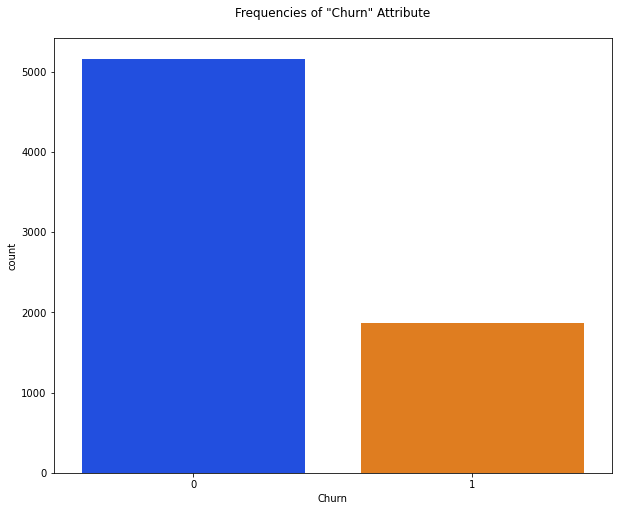


Pie Chart Showing Contribution of Each Category of "Churn" feature:-



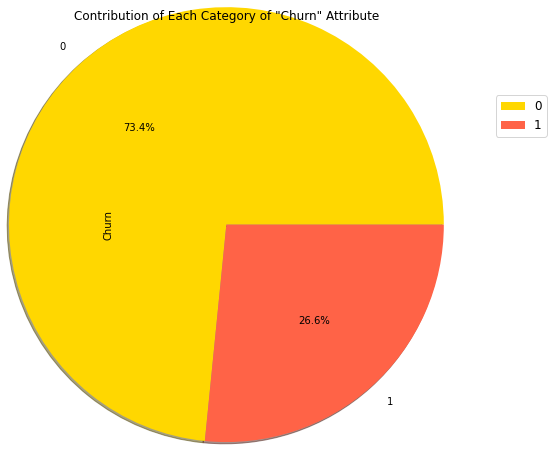

In [36]:
cat_data('Churn')

## Mutivariate Analysis

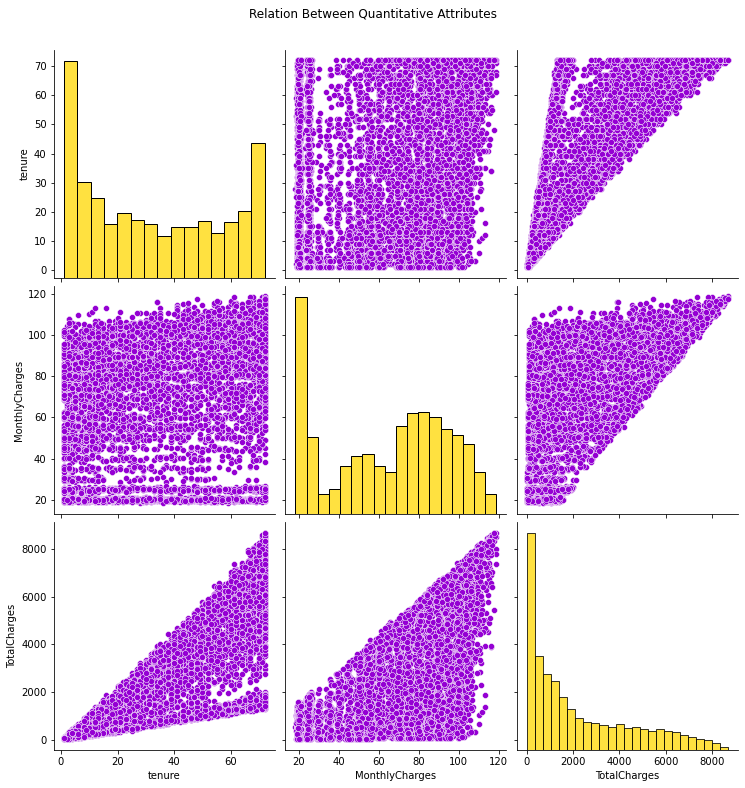

In [37]:
dis_att = teledata[['tenure','MonthlyCharges','TotalCharges']]
sns.pairplot(dis_att, plot_kws={'color':'#9400D3'}, diag_kws={'color':'Gold'}, size=3.5).fig.suptitle(
    'Relation Between Quantitative Attributes', y=1.04);
plt.show()

#### Multivariate Analysis : To Check Correlation

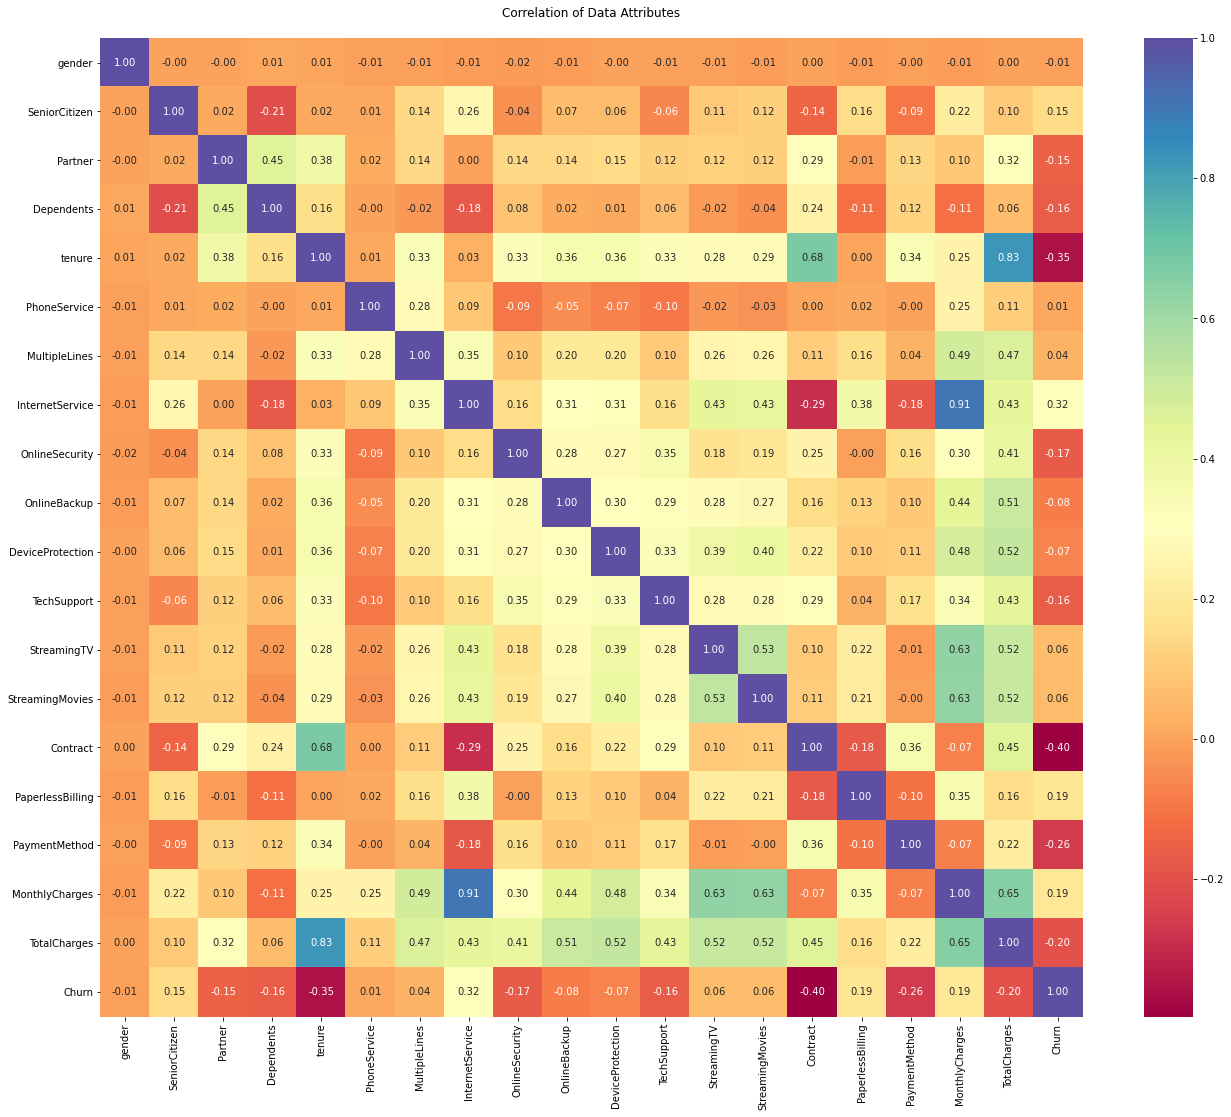

In [38]:
plt.figure(figsize=(22,18))
plt.title('Correlation of Data Attributes\n')
sns.heatmap(teledata.corr(),annot=True,fmt= '.2f',cmap='Spectral');
plt.show()

## Data Pre-Processing:

### Feature Scaling Normalization


In [39]:
clm = ['tenure','MonthlyCharges','TotalCharges']
Scale = MinMaxScaler()
teledata[clm] = Scale.fit_transform(teledata[clm])

###  * Segregate Predictors VS Target Attributes

In [40]:
X = teledata.drop(columns='Churn')
y = teledata['Churn'] 

### * Check for Target Balancing and Fix it if found Imbalanced.

In [41]:
TAC1 = y.value_counts()
TAC1

0    5163
1    1869
Name: Churn, dtype: int64

### Fixing Target Imbalance by Synthetic Minority Oversampling Technique (SMOTE)

In [42]:
# Transforming the dataset
OS = SMOTE(random_state=1)
X, y = OS.fit_resample(X, y)
TAC2 = y.value_counts()
TAC2

1    5163
0    5163
Name: Churn, dtype: int64

### * Perform Train-Test Split.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

###  * Check if the Train and Test data have similar Statistical Characteristics when compared with Original data.

### Comparison of Train data with Original data

In [44]:
skw1 = X.skew().to_frame('Skewness')
skw2 = X_train.skew().to_frame('Skewness')
X1 = pd.concat([X.describe()[0:3].T,skw1],axis=1)
X2 = pd.concat([X_train.describe()[0:3].T,skw2],axis=1)
Xdata = pd.concat([X1, X2], axis=1)

y1 = y.describe()[0:3].T
y2 = y_train.describe()[0:3].T
ydata = pd.concat([y1, y2],axis=1)
skw3 = pd.DataFrame({}, index=['Skewness'], columns=['Churn','Churn'])
skw3.iloc[:,:1] = y.skew()
skw3.iloc[:,1:] = y_train.skew()
ydata = ydata.append(skw3)

columns1=[('______________Original Data______________', 'count'),('______________Original Data______________', 'mean'),
          ('______________Original Data______________', 'std'),('______________Original Data______________', 'Skewness'),
          ('______________X_train Data______________', 'count'),('______________X_train Data______________', 'mean'),
          ('______________X_train Data______________', 'std'),('______________X_train Data______________', 'Skewness')]
Xdata.columns = pd.MultiIndex.from_tuples(columns1)

columns2=[('Original Data', 'Churn'),('y_train Data', 'Churn')]
ydata.columns = pd.MultiIndex.from_tuples(columns2)

print(ydata)
Xdata

         Original Data y_train Data
                 Churn        Churn
count            10326         7744
mean               0.5          0.5
std           0.500024     0.500032
Skewness             0            0


______________Original Data______________            \
                                                     count      mean   
gender                                             10326.0  0.484796   
SeniorCitizen                                      10326.0  0.172284   
Partner                                            10326.0  0.420492   
Dependents                                         10326.0  0.241526   
tenure                                             10326.0  0.370848   
PhoneService                                       10326.0  0.904029   
MultipleLines                                      10326.0  0.418071   
InternetService                                    10326.0  1.345148   
OnlineSecurity                                     10326.0  0.222545   
OnlineBackup                                       10326.0  0.301763   
DeviceProtection                                   10326.0  0.309123   
TechSupport                                        10326.0  0.230777   
StreamingTV                                        10326.0  0.386694   
StreamingMovies                                    10326.0  0.390761   
Contract                                           10326.0  0.498257   
PaperlessBilling                                   10326.0  0.629963   
PaymentMethod                                      10326.0  1.132675   
MonthlyCharges                                     10326.0  0.490602   
TotalCharges                                       10326.0  0.229490   

                                     ______________X_train Data______________  \
                       std  Skewness                                    count   
gender            0.499793  0.060854                                   7744.0   
SeniorCitizen     0.377645  1.735916                                   7744.0   
Partner           0.493662  0.322178                                   7744.0   
Dependents        0.428029  1.207973                                   7744.0   
tenure            0.335089  0.541820                                   7744.0   
PhoneService      0.294566 -2.743743                                   7744.0   
MultipleLines     0.493266  0.332255                                   7744.0   
InternetService   0.749876 -0.659854                                   7744.0   
OnlineSecurity    0.415975  1.334256                                   7744.0   
OnlineBackup      0.459045  0.863862                                   7744.0   
DeviceProtection  0.462154  0.826193                                   7744.0   
TechSupport       0.421350  1.278155                                   7744.0   
StreamingTV       0.487016  0.465398                                   7744.0   
StreamingMovies   0.487945  0.447838                                   7744.0   
Contract          0.765065  1.129221                                   7744.0   
PaperlessBilling  0.482838 -0.538435                                   7744.0   
PaymentMethod     1.145250  0.450770                                   7744.0   
MonthlyCharges    0.286713 -0.375175                                   7744.0   
TotalCharges      0.249152  1.154400                                   7744.0   

                                                
                      mean       std  Skewness  
gender            0.486699  0.499855  0.053232  
SeniorCitizen     0.176395  0.381180  1.698352  
Partner           0.427040  0.494680  0.295053  
Dependents        0.243156  0.429016  1.197672  
tenure            0.372447  0.333646  0.529658  
PhoneService      0.902247  0.297000 -2.709436  
MultipleLines     0.418518  0.493348  0.330410  
InternetService   1.346462  0.748449 -0.661630  
OnlineSecurity    0.223915  0.416893  1.324830  
OnlineBackup      0.307464  0.461473  0.834657  
DeviceProtection  0.310434  0.462701  0.819601  
TechSupport       0.231405  0.421758  1.274022  
StreamingTV       0.384168  0.486429  0.476376  
StreamingMovies   0.395145  0.488913  0.429043  
Contract          

### Comparision of Test data with Original data

In [45]:
skw1 = X.skew().to_frame('Skewness')
skw2 = X_test.skew().to_frame('Skewness')
X1 = pd.concat([X.describe()[0:3].T,skw1],axis=1)
X2 = pd.concat([X_test.describe()[0:3].T,skw2],axis=1)
Xdata2 = pd.concat([X1, X2], axis=1)

y1 = y.describe()[0:3].T
y2 = y_test.describe()[0:3].T
ydata = pd.concat([y1, y2],axis=1)
skw4 = pd.DataFrame({}, index=['Skewness'], columns=['Churn','Churn'])
skw4.iloc[:,:1] = y.skew()
skw4.iloc[:,1:] = y_test.skew()
ydata2 = ydata.append(skw3)

columns1=[('______________Original Data______________', 'count'),('______________Original Data______________', 'mean'),
          ('______________Original Data______________', 'std'),('______________Original Data______________', 'Skewness'),
          ('______________X_test Data______________', 'count'),('______________X_test Data______________', 'mean'),
          ('______________X_test Data______________', 'std'),('______________X_test Data______________', 'Skewness')]
Xdata2.columns = pd.MultiIndex.from_tuples(columns1)

columns2=[('Original Data', 'Churn'),('y_test Data', 'Churn')]
ydata2.columns = pd.MultiIndex.from_tuples(columns2)

print(ydata2)
Xdata2

         Original Data y_test Data
                 Churn       Churn
count            10326        2582
mean               0.5         0.5
std           0.500024    0.500097
Skewness             0           0


______________Original Data______________            \
                                                     count      mean   
gender                                             10326.0  0.484796   
SeniorCitizen                                      10326.0  0.172284   
Partner                                            10326.0  0.420492   
Dependents                                         10326.0  0.241526   
tenure                                             10326.0  0.370848   
PhoneService                                       10326.0  0.904029   
MultipleLines                                      10326.0  0.418071   
InternetService                                    10326.0  1.345148   
OnlineSecurity                                     10326.0  0.222545   
OnlineBackup                                       10326.0  0.301763   
DeviceProtection                                   10326.0  0.309123   
TechSupport                                        10326.0  0.230777   
StreamingTV                                        10326.0  0.386694   
StreamingMovies                                    10326.0  0.390761   
Contract                                           10326.0  0.498257   
PaperlessBilling                                   10326.0  0.629963   
PaymentMethod                                      10326.0  1.132675   
MonthlyCharges                                     10326.0  0.490602   
TotalCharges                                       10326.0  0.229490   

                                     ______________X_test Data______________  \
                       std  Skewness                                   count   
gender            0.499793  0.060854                                  2582.0   
SeniorCitizen     0.377645  1.735916                                  2582.0   
Partner           0.493662  0.322178                                  2582.0   
Dependents        0.428029  1.207973                                  2582.0   
tenure            0.335089  0.541820                                  2582.0   
PhoneService      0.294566 -2.743743                                  2582.0   
MultipleLines     0.493266  0.332255                                  2582.0   
InternetService   0.749876 -0.659854                                  2582.0   
OnlineSecurity    0.415975  1.334256                                  2582.0   
OnlineBackup      0.459045  0.863862                                  2582.0   
DeviceProtection  0.462154  0.826193                                  2582.0   
TechSupport       0.421350  1.278155                                  2582.0   
StreamingTV       0.487016  0.465398                                  2582.0   
StreamingMovies   0.487945  0.447838                                  2582.0   
Contract          0.765065  1.129221                                  2582.0   
PaperlessBilling  0.482838 -0.538435                                  2582.0   
PaymentMethod     1.145250  0.450770                                  2582.0   
MonthlyCharges    0.286713 -0.375175                                  2582.0   
TotalCharges      0.249152  1.154400                                  2582.0   

                                                
                      mean       std  Skewness  
gender            0.479086  0.499659  0.083778  
SeniorCitizen     0.159954  0.366634  1.856402  
Partner           0.400852  0.490166  0.404862  
Dependents        0.236638  0.425101  1.240016  
tenure            0.366053  0.339403  0.578268  
PhoneService      0.909373  0.287134 -2.853648  
MultipleLines     0.416731  0.493113  0.337989  
InternetService   1.341208  0.754271 -0.654783  
OnlineSecurity    0.218435  0.413264  1.363693  
OnlineBackup      0.284663  0.451341  0.954949  
DeviceProtection  0.305190  0.460577  0.846596  
TechSupport       0.228892  0.420201  1.291371  
StreamingTV       0.394268  0.488788  0.432965  
StreamingMovies   0.377614  0.484884  0.505195  
Contract          0.507359  0.781261  1

## 5. Model Training, Testing and Tuning:

###  * Train and Test all Ensemble Models taught in the learning module.


### Building Decision Tree Classifier

Table Showing Decision Tree Classifier Model Accuracies for Train and Test Data:-


,Decision Tree Classifier Accuracy (%)
Data,
Training,0.795455
Testing,0.786212


Heatmap Showing Performance of Decision Tree Classifier:-


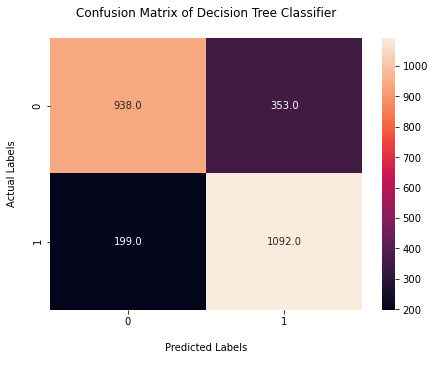


Visualizing the Decision Tree:-


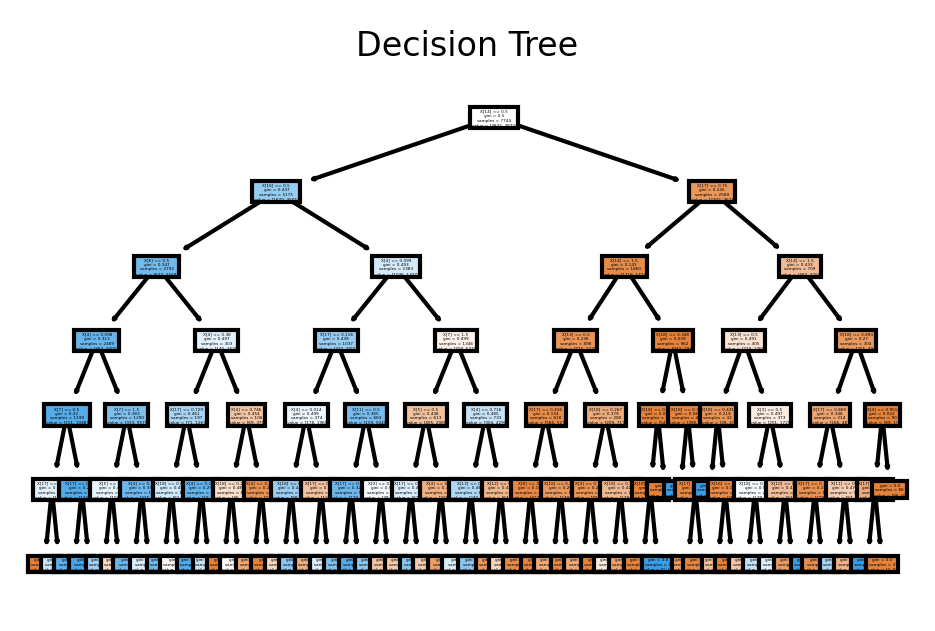

In [46]:
# Building Decision Tree Classifier
DT = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=5)
DT.fit(X_train, y_train)
y_predict = DT.predict(X_test)

# Getting Accuracies for train and test data
Train_AC = DT.score(X_train, y_train)
Test_AC = DT.score(X_test, y_test)

# Displaying Decision Tree Classifier model accuracies for train and test Data
print('Table Showing Decision Tree Classifier Model Accuracies for Train and Test Data:-')
display(pd.DataFrame({'Data':['Training','Testing'],'Decision Tree Classifier Accuracy (%)':
                      [Train_AC,Test_AC]}).set_index('Data'))

# Building Confusion Matrix for Naive Bayes Model
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for Naive Bayes Model
print('Heatmap Showing Performance of Decision Tree Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of Decision Tree Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

# Visualizing the Decision Tree
print('\nVisualizing the Decision Tree:-')
plt.subplots(figsize = (3.7,2.3), dpi=300)
plot_tree(DT, filled=True)
plt.title('Decision Tree', fontdict={'fontsize':8})
plt.show()                              # If plt.show() doesn't work, use "fig.savefig('DecisionTree.png')" to save then load.


* Decision Tree Classifier Model is designed and trained.
* Accuracies of train and test data are almost equal.
* Confusion matrics showing quiet good predictions.
* Decision Tree diagram is good.


### Building Bagging Classifier

Heatmap Showing Performance of Bagging Classifier:-


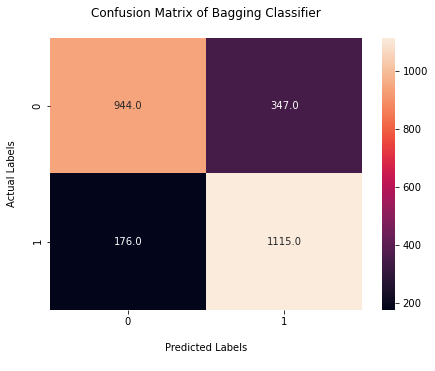

In [47]:
# Building Bagging Classifier
BC = BaggingClassifier(base_estimator=DT, n_estimators=14, random_state=1)
BC.fit(X_train, y_train)
y_predict = BC.predict(X_test)

# Getting Accuracies for train and test data
BCAC1 = BC.score(X_train , y_train)
BCAC2 = BC.score(X_test , y_test)

# Building Confusion Matrix for Bagging Classifier
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for Bagging Classifier
print('Heatmap Showing Performance of Bagging Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of Bagging Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

### Building AdaBoost Classifier


Heatmap Showing Performance of AdaBoost Classifier:-


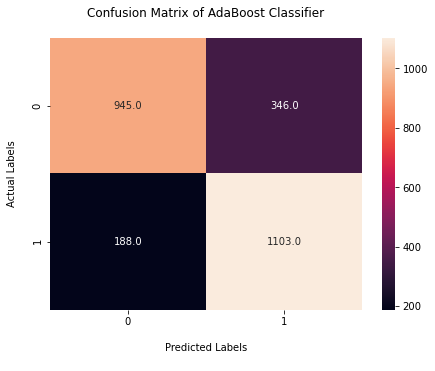

In [48]:
# Building AdaBoost Classifier
AB = AdaBoostClassifier(n_estimators=100, random_state=1)
AB.fit(X_train, y_train)
y_predict = AB.predict(X_test)

# Getting Accuracies for train and test data
ABAC1 = AB.score(X_train , y_train)
ABAC2 = AB.score(X_test , y_test)

# Building Confusion Matrix for AdaBoost Classifier
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for AdaBoost Classifier
print('\nHeatmap Showing Performance of AdaBoost Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of AdaBoost Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

### Building Gradient Boosting Classifier


Heatmap Showing Performance of Gradient Boosting Classifier:-


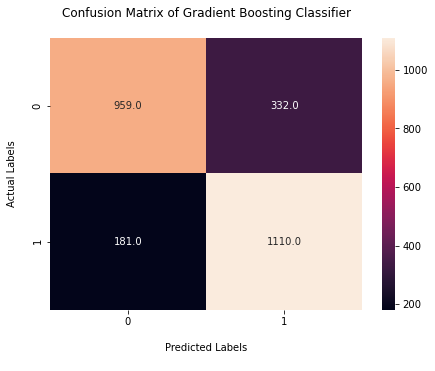

In [49]:
# Building Gradient Boosting Classifier
GB = GradientBoostingClassifier(n_estimators = 55,random_state=1)
GB.fit(X_train, y_train)
y_predict = GB.predict(X_test)

# Getting Accuracies for train and test data
GBAC1 = GB.score(X_train , y_train)
GBAC2 = GB.score(X_test , y_test)

# Building Confusion Matrix for Gradient Boosting Classifier
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for Gradient Boosting Classifier
print('\nHeatmap Showing Performance of Gradient Boosting Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of Gradient Boosting Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

### Building RandomForest Classifier


Heatmap Showing Performance of RandomForest Classifier:-


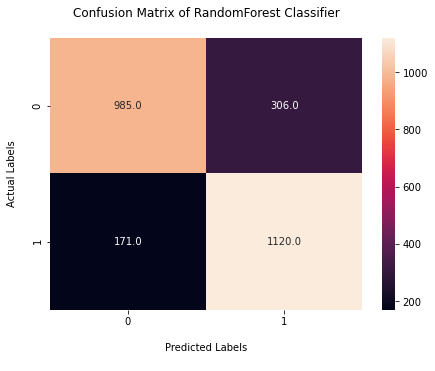

In [50]:
# Building RandomForest Classifier
RF = RandomForestClassifier(n_estimators=50, random_state=1, max_depth=7, max_features=12)
RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)

# Getting Accuracies for train and test data
RFAC1 = RF.score(X_train , y_train)
RFAC2 = RF.score(X_test , y_test)

# Building Confusion Matrix for RandomForest Classifier
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for RandomForest Classifier
print('\nHeatmap Showing Performance of RandomForest Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of RandomForest Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

### Building Voting Classifier

The idea behind the VotingClassifier is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. 

Here we build,
 1. LogisticRegression()
 2. SVC()
 3. DecisionTreeClassifier()

All the models are pre-checked to give best accuracies. Then we us these models to build our Voting Classifier


Heatmap Showing Performance of Voting Classifier:-


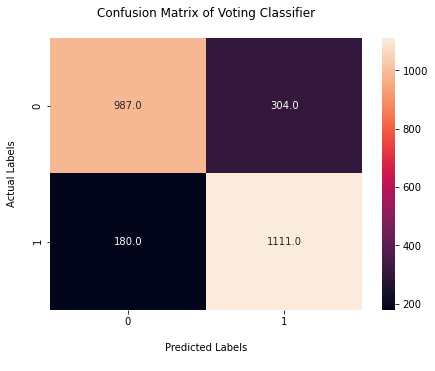

In [51]:
# Creating an empty set and a set of models
models1 = []
models2 = [DT, LogisticRegression(random_state=1,C=100), SVC(gamma='auto',random_state=1,C=10)]

# Appending models to empty set
for i in models2:
    models1.append((f'{i}', i))

# Building Voting Classifier model
VC = VotingClassifier(models1)
VC.fit(X_train,y_train)
y_predict = VC.predict(X_test)

# Getting Accuracies for train and test data
VCAC1 = VC.score(X_train , y_train)
VCAC2 = VC.score(X_test , y_test)

# Building Confusion Matrix for Voting Classifier
CM = metrics.confusion_matrix(y_test, y_predict)
Con_Mat = pd.DataFrame(CM)

# Displaying Confusion Matrix for Voting Classifier
print('\nHeatmap Showing Performance of Voting Classifier:-')
plt.figure(figsize = (7,5))
sns.heatmap(Con_Mat, annot=True, fmt=".1f")
plt.title('Confusion Matrix of Voting Classifier\n')
plt.xlabel('\nPredicted Labels\n')
plt.ylabel('Actual Labels\n')
plt.show()

###  * Display the Classification Accuracies for Train and Test Data.
* Accuracy is the number of correct predictions made by the model by the total number of records.

In [52]:
# Getting Models and Accuracies in lists
M = ['Bagging Classifier','AdaBoost Classifier','Gradient Boosting Classifier','RandomForest Classifier','Voting Classifier']
Train = list(map(lambda x: round(x*100,2) , [BCAC1, ABAC1, GBAC1, RFAC1, VCAC1]))
Test = list(map(lambda x: round(x*100,2) , [BCAC2, ABAC2, GBAC2, RFAC2, VCAC2]))

# Displaying Classification Accuracies of Ensemble Models for Train and Test Data.
print('\033[1mTable Showing Ensemble Models Classification Accuracies for Train and Test Data:-')
all_models1 = pd.DataFrame({'Ensemble Models':M,'Train Accuracy (%)':Train,'Test Accuracy (%)':Test}
                          ).set_index('Ensemble Models')
all_models1

Table Showing Ensemble Models Classification Accuracies for Train and Test Data:-


,Train Accuracy (%),Test Accuracy (%)
Ensemble Models,,
Bagging Classifier,81.04,79.74
AdaBoost Classifier,79.49,79.32
Gradient Boosting Classifier,80.18,80.13
RandomForest Classifier,82.93,81.53
Voting Classifier,81.79,81.25



* In all models train accuracy are almost eaual to test accuracy.
* Bagging and AdaBoost classifiers have got almost same values for train and test accuracies.
* RandomForest Classifier has highest accuracy when compared to other models.


###  * Apply all the possible Tuning Techniques to Train the best model for the given data.
* **Suggestion: Use all possible hyper parameter combinations to extract the best accuracies.**

**List of different Models Applied to our Data:-**
  1. DecisionTreeClassifier('gini')
  2. DecisionTreeClassifier('entropy')
  3. RandomForestClassifier('gini')
  4. RandomForestClassifier('entropy')
  5. LogisticRegression()
  6. GaussianNB()
  7. SVC('rbf')
  8. SVC('linear')
  9. KNeighborsClassifier()
  
All the models are pre-checked to give best accuracies

In [53]:
# Creating list of pre-checked models with best parameters
models = [DT, DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=5), RF,
          RandomForestClassifier(criterion='entropy',n_estimators=50, random_state=1, max_depth=7, max_features=12),
          LogisticRegression(random_state=1,C=100), GaussianNB(), SVC(gamma='auto',random_state=1,C=10), 
          SVC(kernel='linear',gamma='auto',random_state=1,C=50), KNeighborsClassifier(metric='euclidean',n_neighbors=20)]
Train_Accuracy = []
Test_Accuracy = []

# Training models and getting accuracies for Train and Test Data
for i in models:
    i.fit(X_train,y_train)
    Train_Accuracy.append(round(i.score(X_train,y_train),4)*100)
    Test_Accuracy.append(round(i.score(X_test,y_test),4)*100)    


* Here we have applied 9 different tuning techniques.
* All the possible Tuning Techniques are applied for the data and Accuracies for Train and Test data are captured.


###  * Display and Compare all the Models designed with their Train and Test accuracies.

### Displaying Accuracies of Train and Test data for above Trained Models

In [54]:
# Displaying Accuracies of Train and Test Data for trained models
print('\033[1mTable Showing Accuracies of Train and Test Data from Varius Algorithms:-')
model = ['Decision Tree Classifier(gini)','Decision Tree Classifier(entropy)','Random Forest Classifier(gini)',
         'Random Forest Classifier(entropy)','Logistic Regression','Gaussian Naive Bayes','Support Vector Classifier(rbf)',
         'Support Vector Classifier(linear)','K-Neighbors Classifier']
all_models2 = pd.DataFrame({'Trained Model':model,'Train Accuracy (%)':Train_Accuracy,'Test Accuracy (%)':Test_Accuracy}
                         ).set_index('Trained Model')
all_models2

Table Showing Accuracies of Train and Test Data from Varius Algorithms:-


,Train Accuracy (%),Test Accuracy (%)
Trained Model,,
Decision Tree Classifier(gini),79.55,78.62
Decision Tree Classifier(entropy),79.39,78.70
Random Forest Classifier(gini),82.93,81.53
Random Forest Classifier(entropy),82.24,80.79
Logistic Regression,80.06,80.64
Gaussian Naive Bayes,76.60,77.65
Support Vector Classifier(rbf),81.96,81.18
Support Vector Classifier(linear),80.09,80.52
K-Neighbors Classifier,79.82,79.09


### Comparing Accuracies of Train and Test data for All the Trained Models so far.

In [55]:
# Comparing Accuracies of Train and Test data for All the Trained Models so far
print('\033[1mComparing Accuracies of Train and Test Data for All the Trained Models so far:-')
all_models1.drop('RandomForest Classifier',inplace=True)
all_models1.append(all_models2)

Comparing Accuracies of Train and Test Data for All the Trained Models so far:-


,Train Accuracy (%),Test Accuracy (%)
Bagging Classifier,81.04,79.74
AdaBoost Classifier,79.49,79.32
Gradient Boosting Classifier,80.18,80.13
Voting Classifier,81.79,81.25
Decision Tree Classifier(gini),79.55,78.62
Decision Tree Classifier(entropy),79.39,78.70
Random Forest Classifier(gini),82.93,81.53
Random Forest Classifier(entropy),82.24,80.79
Logistic Regression,80.06,80.64
Gaussian Naive Bayes,76.60,77.65



* In all models train accuracy are almost eaual to test accuracy.
* RandomForest Classifier(gini) has highest accuracy when compared to other models.


###  * Select the Final Best Trained Model along with your detailed comments for selecting this model.
    
Based on above results, RandomForest Classifier(gini) has highest accuracies for train and test data.

In [56]:
# Getting Classification Report for RandomForest Classifier(gini) Model 
RF_Predict = RF.predict(X_test)
metrics.classification_report(y_test, RF_Predict, output_dict=True)

{'0': {'precision': 0.8520761245674741,
  'recall': 0.7629744384198296,
  'f1-score': 0.805067429505517,
  'support': 1291},
 '1': {'precision': 0.7854137447405329,
  'recall': 0.8675445391169636,
  'f1-score': 0.8244387191755612,
  'support': 1291},
 'accuracy': 0.8152594887683966,
 'macro avg': {'precision': 0.8187449346540034,
  'recall': 0.8152594887683966,
  'f1-score': 0.8147530743405391,
  'support': 2582},
 'weighted avg': {'precision': 0.8187449346540034,
  'recall': 0.8152594887683966,
  'f1-score': 0.8147530743405391,
  'support': 2582}}


* Here Precision of class 0 is higher than class 1, whereas in recall its vice-versa.
* But we hava a well balanced f1-score, which is good.
* All three accuracies are almost equal.
* Accuracy we saw as highest among all.

By observing above data, we select the **RandomForest Classifier (gini)** as our Final Best Trained Model.

### * Pickle the selected model for future use.


### Saving the Model in SAV File

In [57]:
# Creating file name
Pickle_file = 'PickleFile.sav'

# Saving the Final best trained Random Forest model to the file
pickle.dump(RF, open(Pickle_file, 'wb'))           
  
# Loading the Pickle File to get Random Forest Model
RF_model1 = pickle.load(open(Pickle_file, 'rb'))   
  
# Checking the loaded model by finding accuracies
Train_AC = round(RF_model1.score(X_train , y_train),4)*100
Test_AC = round(RF_model1.score(X_test , y_test),4)*100

print(Train_AC,Test_AC)

82.93 81.53


## 6. Conclusion and Improvisation:

* Initially we wont find null values, but soon after changing the datatypes of quantitative attributes, we found 11 Null values in the data.
* We converted our categorical attributes both Manually and Automatically.
* Then we had done some statistical analysis, which includes some extra features like Analysis of Loyalty of Customers, Gender based Churn rate and Senior Citizen based Churn analysis.
* A detailed Univariate, Bivariate and Multivariate analysis is presented.
* We found Zero Outliers in the data.
* All Quantitative features are normalised before applying them to the models.
* There was imbalance in target attribute, which was fixed later.
* Then all the Ensemble models are build and Accuracies of train and test data are presented.
* All possible tuning techniques are applied to find best model.
* We found **Random Forest Model** as the best model for this data, which has highest accuracy among all models.
* At last we Pickled our final model in two methods.